<a href="https://colab.research.google.com/github/antoniogss/twitter_api/blob/main/word_cloud_eleicao_2022_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install git+https://github.com/tweepy/tweepy.git #latest version

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-bq_phfzs
  Running command git clone -q https://github.com/tweepy/tweepy.git /tmp/pip-req-build-bq_phfzs


In [27]:
import tweepy as tw
import pandas as pd
import matplotlib.pyplot as plt
import google.colab as gc

In [6]:
gc.drive.mount('./gdrive/', 
               force_remount=True
              )

gc.output.clear()

In [7]:
%cd ./gdrive/MyDrive/Programação/APIs/twitter/

/content/gdrive/MyDrive/Programação/APIs/twitter


In [49]:
filename = 'token_twitter.txt'
file  = open(filename,'r')
delimeter = '='

def findValue(fullstring):
  fullstring = fullstring.rstrip('\n')
  value = fullstring[fullstring.index(delimeter)+1:]
  value = value.replace(' ','')
  return value

for line in file:
  if line.startswith('api'):
    api_key = findValue(line)
  if line.startswith('key'):
    key_secret = findValue(line)
  if line.startswith('bearer'):
    bearer_token = findValue(line)

In [50]:
client = tw.Client(bearer_token)

In [51]:
response  = client.search_recent_tweets("#Eleições2022 -#SOSBrasil",max_results=100)

In [52]:
tweets = response.data

for tweet in tweets:
  print(tweet.text)

RT @CaduSummerCity: O mais bizarro não é a diplomação do "vencedor" das eleições e sim, não ter ninguém nas ruas comemorando isso.
Pelo con…
RT @CaduSummerCity: O mais bizarro não é a diplomação do "vencedor" das eleições e sim, não ter ninguém nas ruas comemorando isso.
Pelo con…
RT @CBNoficial: #VIVAVOZ: Para @veramagalhaes a cerimônia tem papel simbólico de extinguir as expectativas de bolsonaristas sobre reviravol…
RT @TSEjusbr: #Eleições2022 ✅ Diplomação do presidente e do vice-presidente da República eleitos acontece nesta segunda-feira (12/12). A ce…
RT @TSEjusbr: #Eleições2022 ✅ Diplomação do presidente e do vice-presidente da República eleitos acontece nesta segunda-feira (12/12). A ce…
RT @flaviofachel: Lula é diplomado como presidente da República. #TSE #Eleições2022 #GloboNews https://t.co/x5gihp83kG
RT @CBNoficial: #VIVAVOZ: Para @veramagalhaes a cerimônia tem papel simbólico de extinguir as expectativas de bolsonaristas sobre reviravol…
RT @CaduSummerCity: O mais bizarro 

In [53]:
tweets_list = [[tweet.text] for tweet in tweets]
df = pd.DataFrame(tweets_list,columns=['texto'])
pd.options.display.max_colwidth=130
df.head()

,texto
0,"RT @CaduSummerCity: O mais bizarro não é a diplomação do ""vencedor"" das eleições e sim, não ter ninguém nas ruas comemorando i..."
1,"RT @CaduSummerCity: O mais bizarro não é a diplomação do ""vencedor"" das eleições e sim, não ter ninguém nas ruas comemorando i..."
2,RT @CBNoficial: #VIVAVOZ: Para @veramagalhaes a cerimônia tem papel simbólico de extinguir as expectativas de bolsonaristas so...
3,RT @TSEjusbr: #Eleições2022 ✅ Diplomação do presidente e do vice-presidente da República eleitos acontece nesta segunda-feira ...
4,RT @TSEjusbr: #Eleições2022 ✅ Diplomação do presidente e do vice-presidente da República eleitos acontece nesta segunda-feira ...


In [54]:
string = pd.Series(df['texto'].values).str.cat(sep=' ')
string

'RT @CaduSummerCity: O mais bizarro não é a diplomação do "vencedor" das eleições e sim, não ter ninguém nas ruas comemorando isso.\nPelo con… RT @CaduSummerCity: O mais bizarro não é a diplomação do "vencedor" das eleições e sim, não ter ninguém nas ruas comemorando isso.\nPelo con… RT @CBNoficial: #VIVAVOZ: Para @veramagalhaes a cerimônia tem papel simbólico de extinguir as expectativas de bolsonaristas sobre reviravol… RT @TSEjusbr: #Eleições2022 ✅ Diplomação do presidente e do vice-presidente da República eleitos acontece nesta segunda-feira (12/12). A ce… RT @TSEjusbr: #Eleições2022 ✅ Diplomação do presidente e do vice-presidente da República eleitos acontece nesta segunda-feira (12/12). A ce… RT @flaviofachel: Lula é diplomado como presidente da República. #TSE #Eleições2022 #GloboNews https://t.co/x5gihp83kG RT @CBNoficial: #VIVAVOZ: Para @veramagalhaes a cerimônia tem papel simbólico de extinguir as expectativas de bolsonaristas sobre reviravol… RT @CaduSummerCity: O mais bizar

In [55]:
caracteres = '#@'

for i in range(len(caracteres)):
  string = string.replace(caracteres[i],'')

string

'RT CaduSummerCity: O mais bizarro não é a diplomação do "vencedor" das eleições e sim, não ter ninguém nas ruas comemorando isso.\nPelo con… RT CaduSummerCity: O mais bizarro não é a diplomação do "vencedor" das eleições e sim, não ter ninguém nas ruas comemorando isso.\nPelo con… RT CBNoficial: VIVAVOZ: Para veramagalhaes a cerimônia tem papel simbólico de extinguir as expectativas de bolsonaristas sobre reviravol… RT TSEjusbr: Eleições2022 ✅ Diplomação do presidente e do vice-presidente da República eleitos acontece nesta segunda-feira (12/12). A ce… RT TSEjusbr: Eleições2022 ✅ Diplomação do presidente e do vice-presidente da República eleitos acontece nesta segunda-feira (12/12). A ce… RT flaviofachel: Lula é diplomado como presidente da República. TSE Eleições2022 GloboNews https://t.co/x5gihp83kG RT CBNoficial: VIVAVOZ: Para veramagalhaes a cerimônia tem papel simbólico de extinguir as expectativas de bolsonaristas sobre reviravol… RT CaduSummerCity: O mais bizarro não é a diplom

In [66]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["Eleicoes2022","Eleições2022","CaduSummerCity","das","con","ce","nesta","nas","RT","por","de",'dar','pois','em','um','da','ser','aqui','vou','dos','ter','não','ao','sou','seu','à','n','se','esse','uma','mais','ele','fazendo','você','pode','essa','é','mas','segue','pra','isso','vez','para','muito','pelo','pela','são', 'na','vamos','https','t','co','c','New','eu','seis','retweets','ano','pessoa','likes','vai','que','ou','anos','7dias','tirou','tem','q','0','O','e','os','assim','só','mesmo','tá','pro','votar','pessoas','vc'])

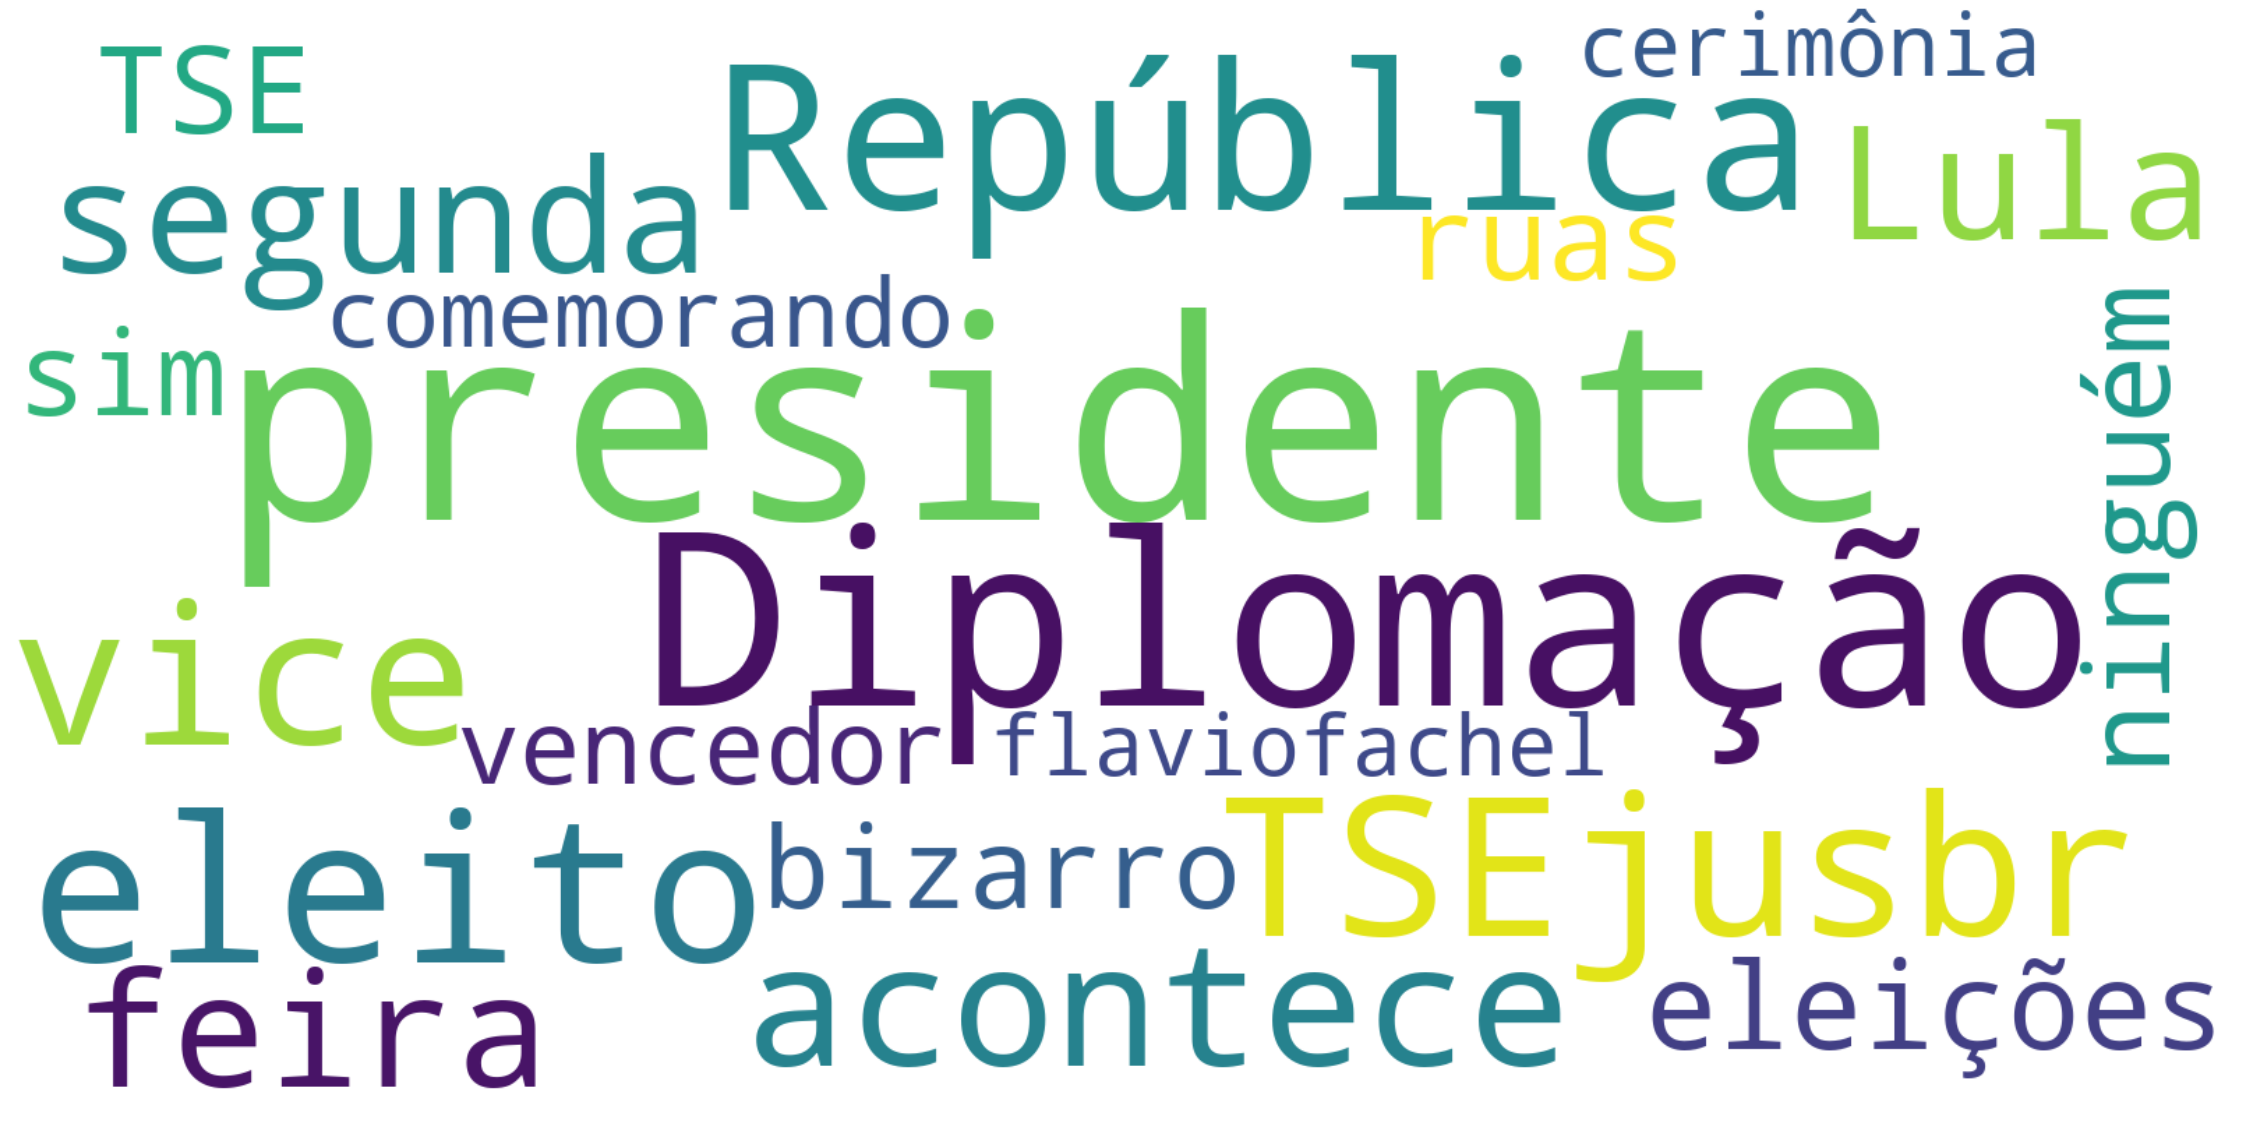

In [67]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=20,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()